In [1]:
%matplotlib inline

In [2]:
import math
import numpy as np

import matplotlib
import matplotlib.pyplot as plt # Plotting

# # from matplotlib.cm import get_cmap
# from matplotlib.colors import LogNorm # Look up table
# from matplotlib.colors import PowerNorm # Look up table
# # import matplotlib.colors as mcolors

font = {'family' : 'serif',
        #'weight' : 'bold',
         'size'   : 12
       }
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)

# # from pymoo.algorithms.moo.nsga2 import NSGA2
# # from pymoo.factory import get_problem
# # from pymoo.optimize import minimize
# # from pymoo.visualization.scatter import Scatter
# # from pymoo.core.problem import ElementwiseProblem

from gvxrPython3 import gvxr
from gvxrPython3 import json2gvxr

SimpleGVXR 2.0.8 (2024-08-01T16:20:27) [Compiler: Microsoft Visual Studio] on Windows
gVirtualXRay core library (gvxr) 2.0.8 (2024-08-01T16:20:25) [Compiler: Microsoft Visual Studio] on Windows


In [3]:
use_Zirconium = True

# Create a mock simulation environment

In [4]:
json2gvxr.initGVXR("../data/find_energy-mock_fuel.json", "OPENGL")

Create an OpenGL context: 1500x500


In [5]:
json2gvxr.initSamples(verbose=0)

In [6]:
Matrix_ZrO2_theoretical_density = 5.68
Kernel_ZrB2_theoretical_density = 6.08

Matrix_UO2_theoretical_density = 10.97
Kernel_UB2_theoretical_density = 12.92

if use_Zirconium:
    gvxr.setCompound("Matrix", "ZrO2")
    gvxr.setCompound("Kernels", "ZrB2")
    gvxr.setDensity("Matrix", (1.0 - 43.1338028 / 100) * Matrix_ZrO2_theoretical_density, "g/cm3");
    gvxr.setDensity("Kernels", (1.0 - 60.0328947 / 100) * Kernel_ZrB2_theoretical_density, "g/cm3");
else:
    gvxr.setCompound("Matrix", "UO2")
    gvxr.setCompound("Kernels", "UB2")
    gvxr.setDensity("Matrix", (1.0 - 43.1338028 / 100) * Matrix_UO2_theoretical_density, "g/cm3");
    gvxr.setDensity("Kernels", (1.0 - 60.0328947 / 100) * Kernel_UB2_theoretical_density, "g/cm3");
    
print("Matrix density:", gvxr.getDensity("Matrix"))
print("Kernel density:", gvxr.getDensity("Kernels"))

Matrix density: 3.23000000096
Kernel density: 2.43000000224


# Linear attenuation coefficients

In [7]:
energy_set_DIAD = []
energy_set_I12 = []

pellet_mu_set_DIAD = []
pellet_mu_set_I12 = []

insert_mu_set_DIAD = []
insert_mu_set_I12 = []

pellet_mu_rho_set_DIAD = []
pellet_mu_rho_set_I12 = []

insert_mu_rho_set_DIAD = []
insert_mu_rho_set_I12 = []



pellet_rho = gvxr.getDensity("Matrix")
insert_rho = gvxr.getDensity("Kernels")


for i in range(7,38+1):
    energy_set_DIAD.append(i)
    pellet_mu_set_DIAD.append(gvxr.getLinearAttenuationCoefficient("Matrix", i, "keV"))
    insert_mu_set_DIAD.append(gvxr.getLinearAttenuationCoefficient("Kernels", i, "keV"))
    pellet_mu_rho_set_DIAD.append(gvxr.getMassAttenuationCoefficient("Matrix", i, "keV"))
    insert_mu_rho_set_DIAD.append(gvxr.getMassAttenuationCoefficient("Kernels", i, "keV"))


for i in range(53,150+1):
    energy_set_I12.append(i)
    pellet_mu_set_I12.append(gvxr.getLinearAttenuationCoefficient("Matrix", i, "keV"))
    insert_mu_set_I12.append(gvxr.getLinearAttenuationCoefficient("Kernels", i, "keV"))
    pellet_mu_rho_set_I12.append(gvxr.getMassAttenuationCoefficient("Matrix", i, "keV"))
    insert_mu_rho_set_I12.append(gvxr.getMassAttenuationCoefficient("Kernels", i, "keV"))

pellet_mu_set_DIAD = np.array(pellet_mu_set_DIAD)
insert_mu_set_DIAD = np.array(insert_mu_set_DIAD)
pellet_mu_set_I12  = np.array(pellet_mu_set_I12)
insert_mu_set_I12  = np.array(insert_mu_set_I12)

energy_set = np.concatenate((energy_set_DIAD, energy_set_I12))
pellet_mu_set = np.concatenate((pellet_mu_set_DIAD, pellet_mu_set_I12))
insert_mu_set = np.concatenate((insert_mu_set_DIAD, insert_mu_set_I12))

delta_mu_set_DIAD = np.abs(pellet_mu_set_DIAD - insert_mu_set_DIAD)
delta_mu_set_I12 = np.abs(pellet_mu_set_I12 - insert_mu_set_I12)
delta_mu_set = np.concatenate((delta_mu_set_DIAD, delta_mu_set_I12))

pellet_mu_rho_set = np.concatenate((pellet_mu_rho_set_DIAD, pellet_mu_rho_set_I12))
insert_mu_rho_set = np.concatenate((insert_mu_rho_set_DIAD, insert_mu_rho_set_I12))

In [8]:
print("Rho pellet is", "{:.2f}".format(pellet_rho), "g/cm3")
print("Rho insert is", "{:.2f}".format(insert_rho), "g/cm3")

Rho pellet is 3.23 g/cm3
Rho insert is 2.43 g/cm3


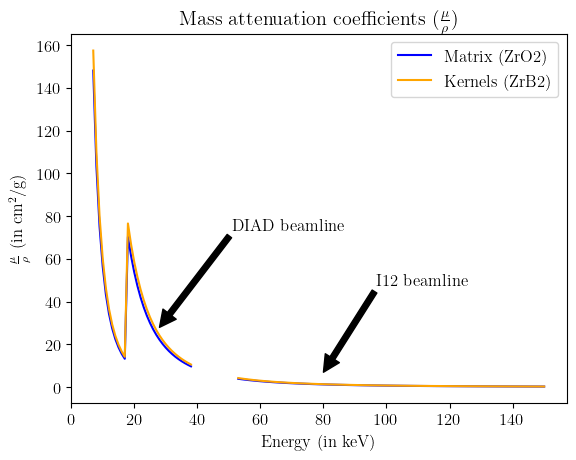

In [9]:
plt.title("Mass attenuation coefficients ($\\frac{\\mu}{\\rho}$)")

if use_Zirconium:
    plt.plot(energy_set_DIAD, pellet_mu_rho_set_DIAD, color="blue", label="Matrix (ZrO2)")
    plt.plot(energy_set_DIAD, insert_mu_rho_set_DIAD, color="orange", label="Kernels (ZrB2)")
else:
    plt.plot(energy_set_DIAD, pellet_mu_rho_set_DIAD, color="blue", label="Matrix (UO2)")
    plt.plot(energy_set_DIAD, insert_mu_rho_set_DIAD, color="orange", label="Kernels (UB2)")
    
plt.plot(energy_set_I12, pellet_mu_rho_set_I12, color="blue")
plt.plot(energy_set_I12, insert_mu_rho_set_I12, color="orange")


plt.annotate('DIAD beamline', xy=(28, 28),  xycoords='data',
            xytext=(0.55, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='black'),
            horizontalalignment='right', verticalalignment='top',
            )

plt.annotate('I12 beamline', xy=(80, 7),  xycoords='data',
            xytext=(0.8, 0.35), textcoords='axes fraction',
            arrowprops=dict(facecolor='black'),
            horizontalalignment='right', verticalalignment='top',
            )


plt.xlabel("Energy (in keV)")
plt.ylabel("$\\frac{\\mu}{\\rho}$ (in  cm\\textsuperscript{2}/g)")
plt.legend()

if use_Zirconium:
    plt.savefig("../results/find_energy-mock_fuel-mu_div_rho-ZrO2-vs-ZrB2.pdf")
else:
    plt.savefig("../results/find_energy-mock_fuel-mu_div_rho-UO2-vs-ZrB2.pdf")

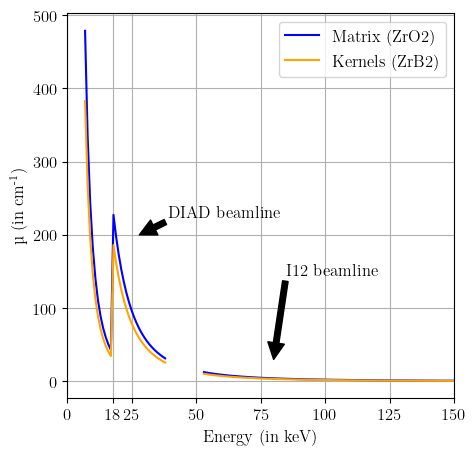

In [10]:
plt.figure(figsize=(5,5))

# plt.title("Linear attenuation coefficients ($\\mu$)")
if use_Zirconium:
    plt.plot(energy_set_DIAD, pellet_mu_set_DIAD, color="blue", label="Matrix (ZrO2)")
    plt.plot(energy_set_DIAD, insert_mu_set_DIAD, color="orange", label="Kernels (ZrB2)")
else:
    plt.plot(energy_set_DIAD, pellet_mu_set_DIAD, color="blue", label="Matrix (UO2)")
    plt.plot(energy_set_DIAD, insert_mu_set_DIAD, color="orange", label="Kernels (UB2)")

plt.plot(energy_set_I12, pellet_mu_set_I12, color="blue")
plt.plot(energy_set_I12, insert_mu_set_I12, color="orange")
plt.grid("on")

plt.annotate('DIAD beamline', xy=(28, 200),  xycoords='data',
            xytext=(0.55, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='black'),
            horizontalalignment='right', verticalalignment='top',
            )

plt.annotate('I12 beamline', xy=(80, 30),  xycoords='data',
            xytext=(0.8, 0.35), textcoords='axes fraction',
            arrowprops=dict(facecolor='black'),
            horizontalalignment='right', verticalalignment='top',
            )

extraticks=[18]
plt.xticks(list(plt.xticks()[0]) + extraticks)

plt.xlim((0,150))
# plt.ylim((0,110))

plt.xlabel("Energy (in keV)")
plt.ylabel("{\\textmu} (in cm\\textsuperscript{-1})")
plt.legend()

if use_Zirconium:
    plt.savefig("../results/find_energy-mock_fuel-mu-ZrO2-vs-ZrB2-with-measured-rho.pdf")
else:
    plt.savefig("../results/find_energy-mock_fuel-mu-UO2-vs-UB2-with-measured-rho.pdf")

# What is the energy that maximises the difference in attenuation coefficients?

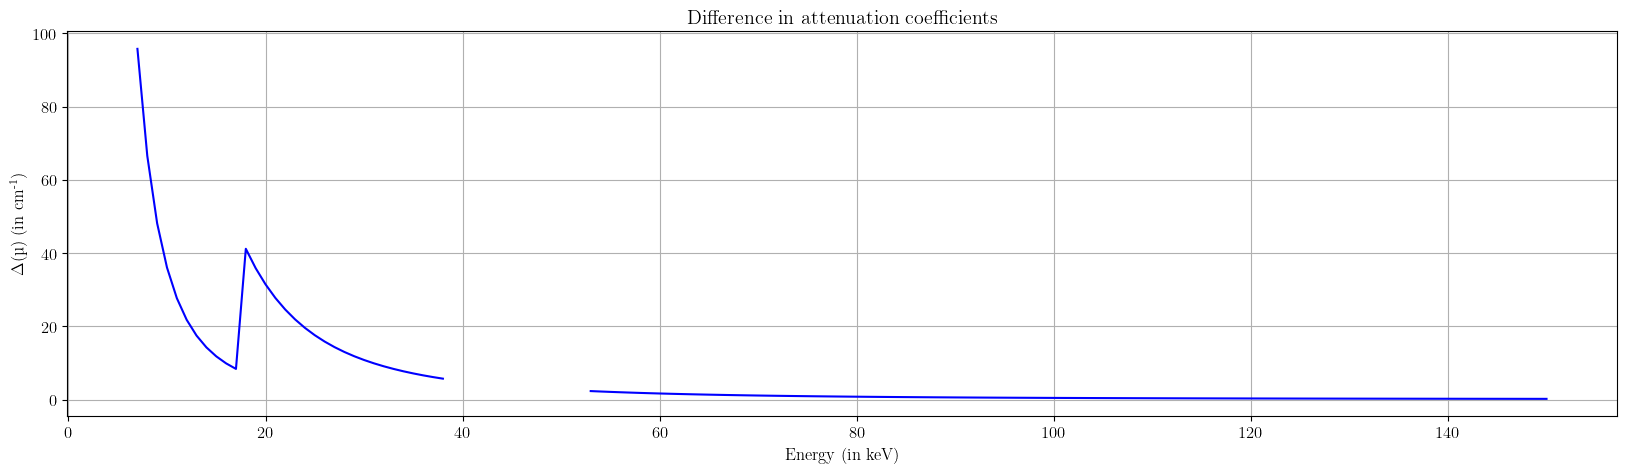

In [11]:
plt.figure(figsize=(20,5))
plt.plot(energy_set_DIAD, delta_mu_set_DIAD, color="blue")
plt.plot(energy_set_I12, delta_mu_set_I12, color="blue")
plt.grid("on")

plt.title("Difference in attenuation coefficients")
plt.xlabel("Energy (in keV)")
plt.ylabel("$\Delta$(\\textmu) (in cm\\textsuperscript{-1})")

if use_Zirconium:
    plt.savefig("../results/find_energy-mock_fuel-delta_mu-with-measured-rho-Zr.pdf")
else:
    plt.savefig("../results/find_energy-mock_fuel-delta_mu-with-measured-rho-U.pdf")

In [12]:
best_id = np.argmax(delta_mu_set)
best_energy = energy_set[best_id]
best_pellet_mu = pellet_mu_set[best_id]
best_insert_mu = insert_mu_set[best_id]
best_delta_mu = delta_mu_set[best_id]
pellet_radius_in_cm = 0.5

print("Difference in mu is greater at", best_energy, "keV")
print("mu Pellet (ZrO2) is", "{:.2f}".format(best_pellet_mu), "cm-1")
print("mu Inserts (ZrB2) is", "{:.2f}".format(best_insert_mu), "cm-1")
print("delta mu is", "{:.2f}".format(best_delta_mu), "cm-1")

Difference in mu is greater at 7 keV
mu Pellet (ZrO2) is 478.49 cm-1
mu Inserts (ZrB2) is 382.71 cm-1
delta mu is 95.78 cm-1


# Issue: At 7 keV, 0 photon reach the detector

A scan at 7 keV for this material and thickness won't work as photons will not cross the matter.

- For Zirconium:

    $\exp\left(- \left(\left(478.49 \times 0.1 \right) + \left(382.71 \times 0.01\right)\right)\right) = 0.000$

- For Uranium:

    $\exp\left(- \left(\left(924.12 \times 0.1 \right) + \left(382.71 \times 0.01\right)\right)\right) = 0.000$

In [13]:
print("exp(-" + str(best_pellet_mu) + " x " + str(2.0 * pellet_radius_in_cm) + ") =",  "{:.4f}".format(math.exp(-best_pellet_mu * 2.0 * pellet_radius_in_cm)))


print("exp(-((478.49 x 0.1) + (382.71 x 0.01))) =", math.exp(-((best_pellet_mu * 2*pellet_radius_in_cm) + (best_insert_mu * 0.01))))


exp(-478.4875810857702 x 1.0) = 0.0000
exp(-((478.49 x 0.1) + (382.71 x 0.01))) = 3.415043471854498e-210


# Issue: At 18 keV, 0 photon reach the detector

A scan at 18 keV for this material and thickness won't work as photons will not cross the matter.


- For Zirconium:

    $\exp(-227.34 \times 1) = 0.0000$

- For Uranium:

    $\exp(-439.08 \times 1) = 0.0000$


In [14]:
print("exp(-" + str(gvxr.getLinearAttenuationCoefficient("Matrix", 18, "keV")) + " x " + str(2.0 * pellet_radius_in_cm) + ") =",  "{:.4f}".format(math.exp(-gvxr.getLinearAttenuationCoefficient("Matrix", 18, "keV") * 2.0 * pellet_radius_in_cm)))

exp(-227.3433308660052 x 1.0) = 0.0000


# Solution: Find a "best" compromise

A higher energy must be used to maximise both:

1. $\left|\mu(\text{pellet}, E) - \mu(\text{inserts}, E)\right|$
2. $\exp\left(-\mu(\text{pellet}, E) \times 1.0\right)$

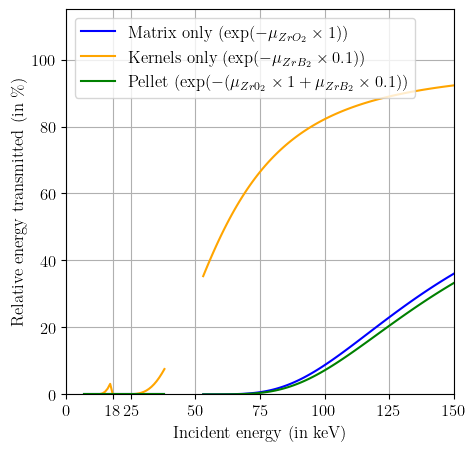

In [15]:
plt.figure(figsize=(5,5))

plt.plot(energy_set_DIAD, 100 * np.exp(-pellet_mu_set_DIAD * 1), color="blue", label="Matrix only $(\\exp(-\\mu_{ZrO_2} \\times 1))$")
plt.plot(energy_set_DIAD, 100 * np.exp(-insert_mu_set_DIAD * 0.1), color="orange", label="Kernels only $(\\exp(-\\mu_{ZrB_2} \\times 0.1))$")
plt.plot(energy_set_DIAD, 100 * np.exp(-insert_mu_set_DIAD * 0.1 - pellet_mu_set_DIAD * 1), color="green", label="Pellet $(\\exp(-(\\mu_{Zr0_2} \\times 1 + \\mu_{ZrB_2} \\times 0.1))$")

plt.plot(energy_set_I12, 100 * np.exp(-pellet_mu_set_I12 * 1), color="blue")
plt.plot(energy_set_I12, 100 * np.exp(-insert_mu_set_I12 * 0.1), color="orange")
plt.plot(energy_set_I12, 100 * np.exp(-insert_mu_set_I12 * 0.1 - pellet_mu_set_I12 * 1), color="green")

plt.xlabel("Incident energy (in keV)")
plt.ylabel("Relative energy transmitted (in \%)")
plt.legend()
plt.grid("on")
# plt.axis("equal")
# plt.xticks(np.concatenate(np.arange(0, 150, step=20))
# plt.yticks(np.arange(0, 100, step=20))

extraticks=[18]
plt.xticks(list(plt.xticks()[0]) + extraticks)

plt.xlim((0,150))
plt.ylim((0,115))

if use_Zirconium:
    plt.savefig("../results/find_energy-mock_fuel-beer-ZrO2-vs-ZrB2-with-measured-rho.pdf")
else:
    plt.savefig("../results/find_energy-mock_fuel-beer-UO2-vs-UB2-with-measured-rho.pdf")

In [16]:
for energy, transmission in zip(energy_set_I12, 100 * np.exp(-insert_mu_set_I12 * 0.1 - pellet_mu_set_I12 * 1)):
    
    print(energy, transmission, transmission >= 5.0)


53 0.00010229140722580589 False
54 0.00020259647774017726 False
55 0.0003832018323526439 False
56 0.0006948370302862834 False
57 0.0012119729718184347 False
58 0.0020398992663631065 False
59 0.0033224133947570788 False
60 0.005249732289995198 False
61 0.008065594217655908 False
62 0.012075443436031686 False
63 0.017651152796759828 False
64 0.025235301370858963 False
65 0.0353431604335952 False
66 0.04856241000301229 False
67 0.06555047874985145 False
68 0.08702953314632166 False
69 0.11377926595393137 False
70 0.14662774072810117 False
71 0.18644063195141994 False
72 0.23410925663580467 False
73 0.29053782235740966 False
74 0.3566303204806763 False
75 0.4332774751405766 False
76 0.5213441227019522 False
77 0.6216573476323054 False
78 0.7349956436982137 False
79 0.8620793084336562 False
80 1.003562217636993 False
81 1.1600672273321093 False
82 1.3320626867718903 False
83 1.5199685552506301 False
84 1.7241202035706695 False
85 1.944767419945213 False
86 2.182074724748913 False
87 2.43612

In [17]:
# gvxr.terminate()